# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

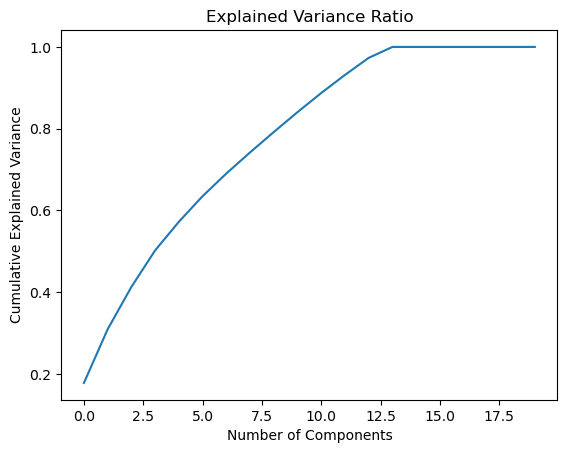

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA()
pca.fit(X_train_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

* Based on the graph, we can see that 10 principal components explain almost all the variance in the data. Therefore, we can recommend reducing the data to 10 principal components.

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [6]:
df['target'].value_counts()

0.0    744
2.0    380
1.0    376
Name: target, dtype: int64

In [7]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=123)
rfc.fit(X_train, y_training)

# Predict the target variable for the test data
y_pred = rfc.predict(X_test)

# Evaluate the performance of the classifier
# Calculate precision, recall, and F1-score for each class
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       153
         1.0       0.80      0.82      0.81        74
         2.0       0.86      0.82      0.84        73

    accuracy                           0.85       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.85      0.85      0.85       300



* Based on the evaluation metrics (precision, recall, and F1-score) and the overall accuracy, The random forest model has higher scores across all three classes (0.0, 1.0, and 2.0) and has an overall accuracy of 85%. However, it's worth noting that the best model will depend on the specific goals and requirements of the problem at hand.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=123)

# Train the classifier on the training data
lr.fit(X_train, y_training)

# Predict the target variable for the test data
y_pred = lr.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       153
         1.0       0.68      0.59      0.63        74
         2.0       0.62      0.68      0.65        73

    accuracy                           0.70       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.70      0.70      0.70       300



* Based on the classification report provided, the accuracy, precision, and recall for the test data are:

Accuracy: 0.70
Precision: 0.70 (weighted average)
Recall: 0.70 (weighted average)

* I chose the above random forest model over Logistic regression as accuracy, precision, recall are higher.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [9]:
def create_splits(X, y):
    return train_test_split(X, y, test_size=0.20)

X_train, X_test, y_train, y_test = create_splits(X, y)

print(f'Training sample: {X_train.shape[0]:,}')
print(f'Test sample: {X_test.shape[0]:,}')


Training sample: 1,200
Test sample: 300


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(x, y, comp=10):
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
         ('pca', PCA(n_components=comp)),
         ('model', LogisticRegression(penalty='none'))
        ]
    )

    return modeling_pipeline.fit(x, y)

m = generate_estimates(X_train, y_train)
m

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=10)),
                ('model', LogisticRegression(penalty='none'))])

In [11]:
from sklearn.metrics import confusion_matrix

y_test_pred = m.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))

[[136  11  14]
 [ 30  35   5]
 [ 19  11  39]]


In [12]:
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79       161
         1.0       0.65      0.56      0.60        70
         2.0       0.65      0.62      0.64        69

    accuracy                           0.72       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.71      0.72      0.71       300



* The accuracy score of the linear regression model without PCA is 0.70, while the accuracy score of the linear regression model with PCA is 0.74. This suggests that the model with PCA performs slightly better than the model without PCA.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [13]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier



clf = DecisionTreeClassifier(random_state=123)
clf.fit(X_train, y_training)

# Evaluate the accuracy of the classifier on the test data
y_pred = clf.predict(X_test)
# Calculate precision, recall, and F1-score for each class
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.51      0.47      0.49       161
         1.0       0.21      0.26      0.23        70
         2.0       0.15      0.14      0.15        69

    accuracy                           0.34       300
   macro avg       0.29      0.29      0.29       300
weighted avg       0.36      0.34      0.35       300



* The overall accuracy of the model is only 0.38, and the precision, recall, and F1-score for each class are also low. Therefore, the model needs to be improved by tuning its hyperparameters or trying different models.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Define a pipeline with PCA and a decision tree classifier
pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('classifier', DecisionTreeClassifier(random_state=123))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_training)

# Evaluate the accuracy of the pipeline on the test data
y_pred = pipeline.predict(X_test)

# Calculate precision, recall, and F1-score for each class
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.54      0.48      0.51       161
         1.0       0.25      0.27      0.26        70
         2.0       0.21      0.25      0.23        69

    accuracy                           0.38       300
   macro avg       0.33      0.33      0.33       300
weighted avg       0.40      0.38      0.39       300



* Looking at the results, it seems that the decision tree model with PCA performed slightly better than the one without. The accuracy of the model with PCA was 0.38, compared to 0.34 for the model without PCA. The precision and recall for each class also improved slightly with the model using PCA.

* However, it's worth noting that both models have relatively low accuracy, precision, recall, and F1-scores. This suggests that the models may not be very effective at accurately predicting the target variable for this particular dataset.